#Regresión Lineal con Machine Learning

La tarea de regresión consiste en encontrar una función que nos permita predecir el valor de una o más variables a partir de una o más características (o features). Un ejemplo sería el de predecir el precio de una casa a partir de su número de habitaciones, metros cuadrados, etc. El modelos de ML más sencillo para este tipo de tarea es el modelo de regresión lineal.

Entrenar un modelo de regresión lineal consiste en encontrar el conjunto de pesos, que minimizen una función de coste determinada. En el caso de la regresión, el error medio cuadrático suele utilizarse comunmente como medida del error.

Vamos a generar un conjunto simple de datos sintéticos:

y = 3x + *perturbación gaussiana*

In [1]:
import numpy as np
import numpy.random as rnd

SEED = 42
TOTAL_SAMPLES = 100
FONT_SIZE = 18

np.random.seed(SEED)

In [2]:
# Funciones para representar gráficas que van a facilitar el código

import matplotlib.pyplot as plt

def draw_scatter_plot(X, y):
    plt.plot(X, y, "b.")
    plt.xlabel("$x$", fontsize=FONT_SIZE)
    plt.ylabel("$y$", rotation=0, fontsize=FONT_SIZE)
    plt.show()

def draw_prediction(X, y, y_predict):
    plt.plot(X, y_predict, "r-", linewidth=2, label="Predicción")
    plt.plot(X, y, "b.")
    plt.xlabel("$x$", fontsize=FONT_SIZE)
    plt.ylabel("$y$", rotation=0, fontsize=FONT_SIZE)
    plt.legend(loc="upper left", fontsize=FONT_SIZE)
    plt.show()

In [3]:
# Matriz de características

X = np.linspace(0, 2, TOTAL_SAMPLES).reshape(-1, 1)

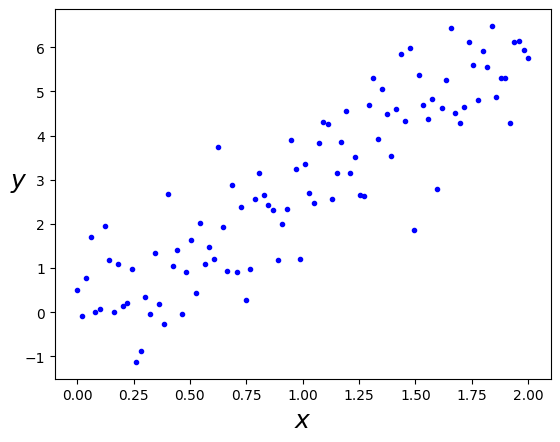

In [4]:
# Generamos datos sintéticos con una variable objetivo con relación lineal
# y = 3x + perturbación gaussiana

y = 3*X + np.random.randn(TOTAL_SAMPLES, 1)

draw_scatter_plot(X, y)

En este caso tenemos una única característica a partir de la cual queremos predecir una sola variable (por ejemplo el precio de una casa en función de sus metros cuadrados). Podemos usar el modelo de *LinearRegression* de la librería scikit-learn.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f"y = {lin_reg.coef_[0][0]}x + {lin_reg.intercept_[0]}")

lin_reg.coef_, lin_reg.intercept_

y = 3.0689663366832822x + -0.1728128540773768


(array([[3.06896634]]), array([-0.17281285]))

RMSE Validación Cruzada: 0.8950401192651671
RMSE Entrenamiento: 0.902720728408337


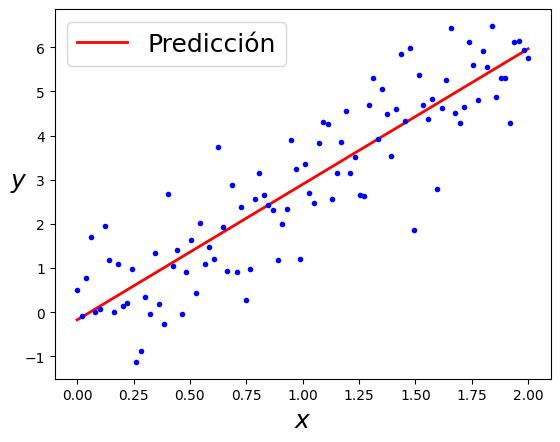

In [6]:
from sklearn.model_selection import cross_val_score

rmse = -cross_val_score(lin_reg, X, y, scoring="neg_root_mean_squared_error", cv=5)
print(f"RMSE Validación Cruzada: {rmse.mean()}")

y_predict = lin_reg.predict(X)
print(f"RMSE Entrenamiento: {root_mean_squared_error(y, y_predict)}")

draw_prediction(X, y, y_predict)

Como puedes ver, este método es muy sencillo, eficiente y explicable. Sin embargo, si nuestros datos no siguen una tendencia lineal el resultado que obtendremos no será muy bueno.

## Regresión polinomial

Vamos a generar ahora unos datos sintéticos que no van a tener una tendencia lineal.

y = 0.5x² + x + 2 + *perturbación gaussiana*

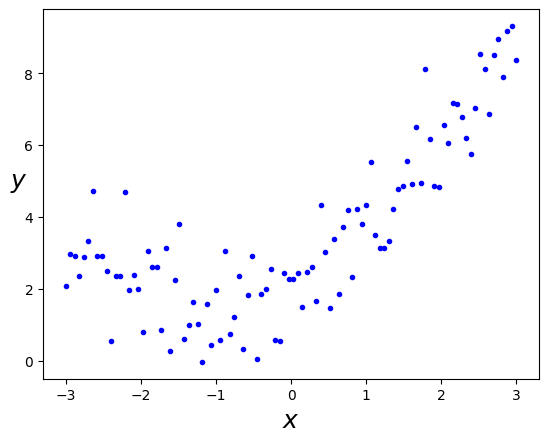

In [7]:
X = np.linspace(-3, 3, TOTAL_SAMPLES).reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(TOTAL_SAMPLES, 1)

draw_scatter_plot(X, y)

RMSE Validación Cruzada: 2.438887610351739
RMSE Entrenamiento: 1.5896529966491653


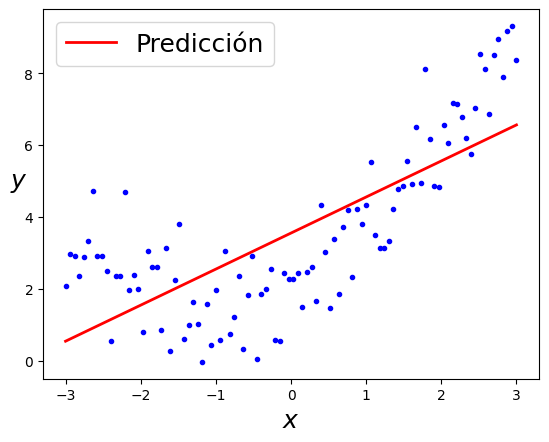

In [8]:
lin_reg.fit(X, y)

rmse = -cross_val_score(lin_reg, X, y, scoring="neg_root_mean_squared_error", cv=5)
print(f"RMSE Validación Cruzada: {rmse.mean()}")

y_predict = lin_reg.predict(X)
print(f"RMSE Entrenamiento: {root_mean_squared_error(y, y_predict)}")

draw_prediction(X, y, y_predict)

En el ejemplo anterior, como no hay una relación lineal entre la entrada y la salida se produce infraajuste. Cuando sabemos que esto sucede podemos seguir usando un modelo de regresión lineal añadiendo nuevas características que sean potencias de las características originales.

In [9]:
X_new = np.hstack((X, X**2))  # en la 1ª columna está x, en la 2ª x²

X[0:5], X_new[0:5]

(array([[-3.        ],
        [-2.93939394],
        [-2.87878788],
        [-2.81818182],
        [-2.75757576]]),
 array([[-3.        ,  9.        ],
        [-2.93939394,  8.64003673],
        [-2.87878788,  8.28741965],
        [-2.81818182,  7.94214876],
        [-2.75757576,  7.60422406]]))

y = 0.46712875252447134x² + 1.0033617160913655x + 2.122910526293208
RMSE Validación Cruzada: 1.0824864551930533
RMSE Entrenamiento: 0.9445952832694822


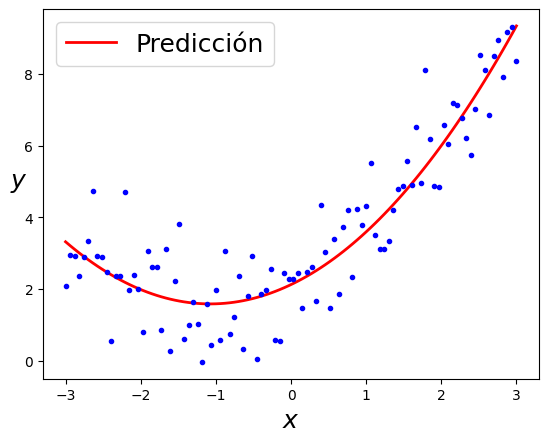

(array([[1.00336172, 0.46712875]]), array([2.12291053]))

In [10]:
# Ajustamos el nuevo modelo

lin_reg.fit(X_new, y)
print(f"y = {lin_reg.coef_[0][1]}x² + {lin_reg.coef_[0][0]}x + {lin_reg.intercept_[0]}")

rmse = -cross_val_score(lin_reg, X_new, y, scoring="neg_root_mean_squared_error", cv=5)
print(f"RMSE Validación Cruzada: {rmse.mean()}")

y_predict = lin_reg.predict(X_new)
print(f"RMSE Entrenamiento: {root_mean_squared_error(y, y_predict)}")

draw_prediction(X, y, y_predict)

lin_reg.coef_, lin_reg.intercept_

En estos casos debemos *preprocesar* nuestros datos para transformarlos a un sistema de coordenadas en los que el modelo de regresión lineal sea capaz de funcionar mejor.

Una forma más sencilla de hacerlo es usar la clase `PolynomialFeatures` que permite transformar variables independientes en sus versiones polinómicas.

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Crea un objeto de clase PolynomialFeatures con grado 2 (degree=2), lo que
# significa que generará términos cuadráticos para cada variable en X.
# include_bias=False evita incluir una columna de unos (el término constante),
# ya que usualmente se agrega en la regresión de forma manual.
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transforma X en una matriz polinómica con términos hasta el segundo grado.
# Si X tuviera más columnas, se generarían todas las combinaciones polinómicas
# posibles hasta el grado especificado.
X_new = poly_features.fit_transform(X)

X[0:5], X_new[0:5]

(array([[-3.        ],
        [-2.93939394],
        [-2.87878788],
        [-2.81818182],
        [-2.75757576]]),
 array([[-3.        ,  9.        ],
        [-2.93939394,  8.64003673],
        [-2.87878788,  8.28741965],
        [-2.81818182,  7.94214876],
        [-2.75757576,  7.60422406]]))

y = 0.46712875252447134x² + 1.0033617160913655x + 2.122910526293208
RMSE Validación Cruzada: 1.0824864551930533
RMSE Entrenamiento: 0.9445952832694822


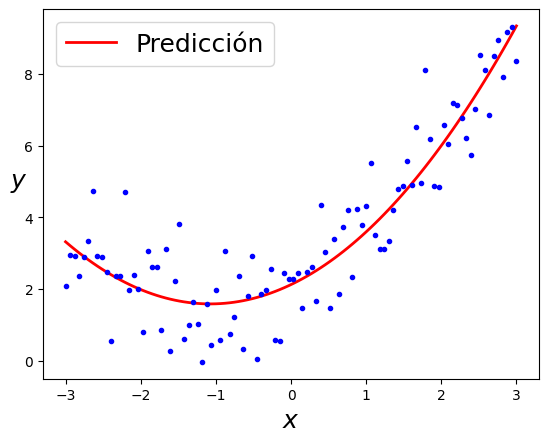

(array([[1.00336172, 0.46712875]]), array([2.12291053]))

In [12]:
lin_reg.fit(X_new, y)

y_predict = lin_reg.predict(X_new)
print(f"y = {lin_reg.coef_[0][1]}x² + {lin_reg.coef_[0][0]}x + {lin_reg.intercept_[0]}")

rmse = -cross_val_score(lin_reg, X_new, y, scoring="neg_root_mean_squared_error", cv=5)
print(f"RMSE Validación Cruzada: {rmse.mean()}")

y_predict = lin_reg.predict(X_new)
print(f"RMSE Entrenamiento: {root_mean_squared_error(y, y_predict)}")

draw_prediction(X, y, y_predict)

lin_reg.coef_, lin_reg.intercept_

¿Como podemos saber de antemano si mis datos siguen una tendencia lineal o no (especialmente si trabajamos con múltiples variables)?

Una forma es probar diferentes grados de polinomios y quedarte con aquel que de mejores resultados.

Scikit-learn nos permite hacer esto de manera sencilla.

Ecuación (grado 1): y = 1.0033617160913655x^1 + 3.552607617352954
RMSE Validación Cruzada: 2.438887610351739
RMSE Entrenamiento: 1.5896529966491653


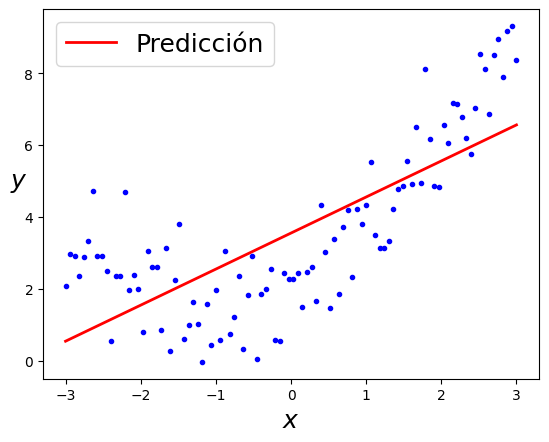

Ecuación (grado 2): y = 0.46712875252447134x^2 + 1.0033617160913655x^1 + 2.122910526293208
RMSE Validación Cruzada: 1.0824864551930533
RMSE Entrenamiento: 0.9445952832694822


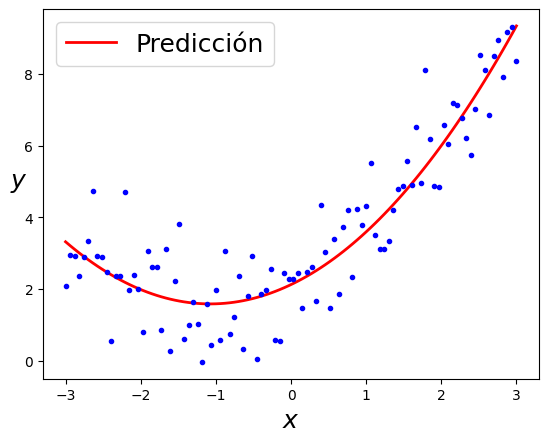

Ecuación (grado 3): y = -0.017962266036571473x^3 + 0.46712875252447156x^2 + 1.1023042771997018x^1 + 2.1229105262932078
RMSE Validación Cruzada: 1.4191596849952024
RMSE Entrenamiento: 0.9415720468640427


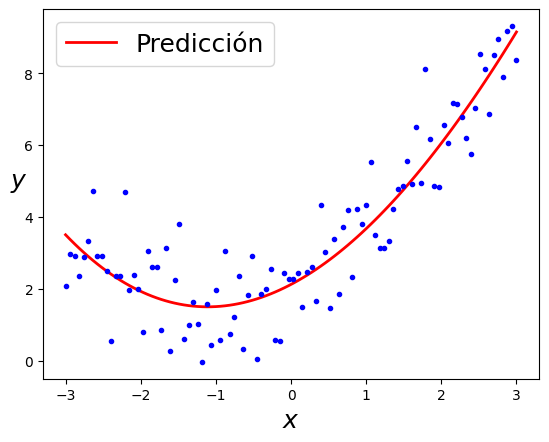

Ecuación (grado 4): y = -0.023362437052527624x^4 + -0.017962266036571584x^3 + 0.6509328716099098x^2 + 1.1023042771997011x^1 + 1.954223717465099
RMSE Validación Cruzada: 1.381882191049309
RMSE Entrenamiento: 0.9295683194566975


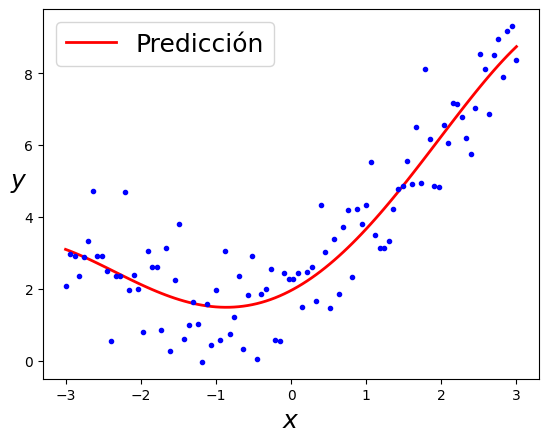

Ecuación (grado 5): y = 0.014647635326757391x^5 + -0.023362437052527687x^4 + -0.16730806730204076x^3 + 0.6509328716099095x^2 + 1.395931392120104x^1 + 1.9542237174651007
RMSE Validación Cruzada: 3.512195601192046
RMSE Entrenamiento: 0.9185176417522424


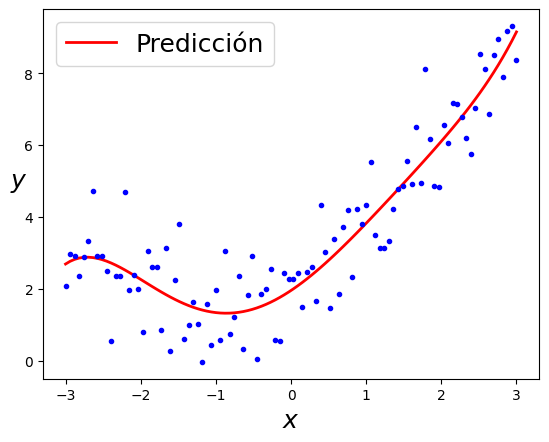

Ecuación (grado 10): y = -0.0015880132779350744x^10 + 2.166212582629945e-05x^9 + 0.033658168193668854x^8 + 0.0006500711265568122x^7 + -0.2494381247059937x^6 + 0.0014883319213169002x^5 + 0.7375322655710718x^4 + -0.10756629247184336x^3 + -0.18793429106471196x^2 + 1.3325861728594348x^1 + 2.1157743063572165
RMSE Validación Cruzada: 127.9856274434183
RMSE Entrenamiento: 0.9083718122418011


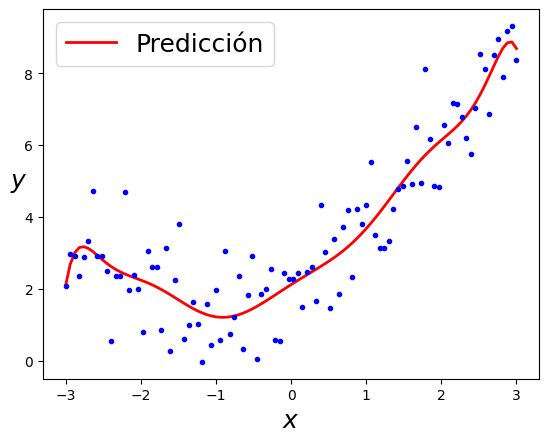

Ecuación (grado 20): y = -6.436729444269851e-06x^20 + 8.806204163658293e-06x^19 + 0.0002494372205628889x^18 + -0.0004046994269432863x^17 + -0.0040161764980657265x^16 + 0.007793466374203575x^15 + 0.03518789685043819x^14 + -0.0817527571253047x^13 + -0.1879883754520491x^12 + 0.5080439148323933x^11 + 0.6743597646435847x^10 + -1.903148491708931x^9 + -1.7962748201473502x^8 + 4.175395631008112x^7 + 3.5252860659151293x^6 + -4.924868385997291x^5 + -4.093462596951651x^4 + 2.4815325113024134x^3 + 2.428897380922031x^2 + 0.9591584562729336x^1 + 1.873494236219734
RMSE Validación Cruzada: 2191373.459166174
RMSE Entrenamiento: 0.8891873926665081


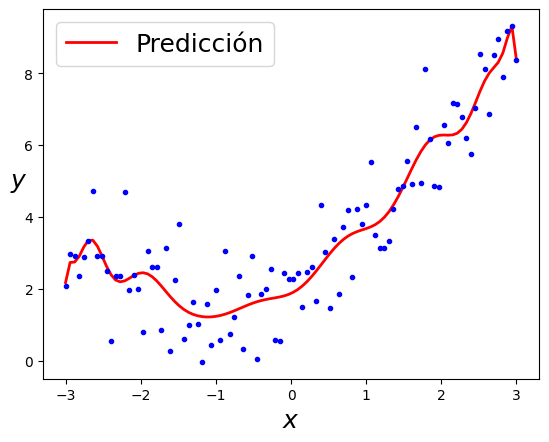

Ecuación (grado 40): y = -3.3566076521761398e-12x^40 + 1.825897086984276e-12x^39 + 1.74598039160634e-10x^38 + -8.372859232412326e-11x^37 + -3.847694559373606e-09x^36 + 1.5821978344275796e-09x^35 + 4.6335112251762366e-08x^34 + -1.5663190130491888e-08x^33 + -3.259390789154661e-07x^32 + 8.425169066621013e-08x^31 + 1.305614112203875e-06x^30 + -2.2073972872187252e-07x^29 + -2.520974718145561e-06x^28 + 1.4430231829133093e-07x^27 + 6.901753935989693e-07x^26 + 2.454507659172704e-07x^25 + 2.5980566186104945e-06x^24 + 1.6107686398345458e-07x^23 + 2.17621636379573e-06x^22 + 7.438332175311883e-08x^21 + 1.2077828048492107e-06x^20 + 2.8132112005981557e-08x^19 + 5.359645580728023e-07x^18 + 9.335614984844287e-09x^17 + 2.058235496017231e-07x^16 + 2.8266477824079525e-09x^15 + 7.14181854904613e-08x^14 + 8.009981514788014e-10x^13 + 2.299818072459711e-08x^12 + 2.1646659728779014e-10x^11 + 6.99502519781903e-09x^10 + 5.672823701538291e-11x^9 + 2.0321893118243177e-09x^8 + 1.4671213743850452e-11x^7 + 5.6646049

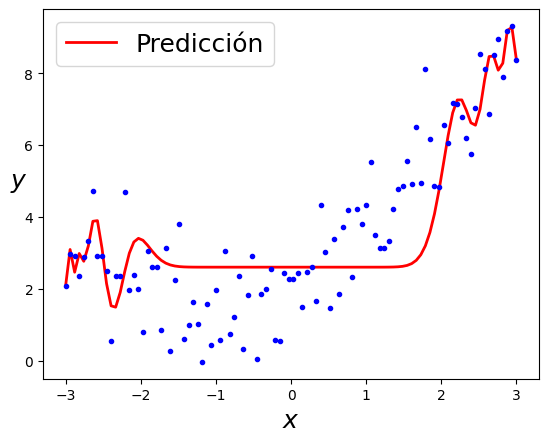

Ecuación (grado 300): y = 1.1935711189784959e-135x^300 + 4.074324422174851e-135x^299 + -2.0641662373364284e-134x^298 + -7.046152293161675e-134x^297 + 8.56074412253129e-134x^296 + 2.922260293122215e-133x^295 + 3.0582258395570833e-134x^294 + 1.043945239643757e-133x^293 + 7.151549007007978e-135x^292 + 2.4412321875030915e-134x^291 + 1.3877037510751446e-135x^290 + 4.7370346924601586e-135x^289 + 2.41977218509563e-136x^288 + 8.260097101979746e-136x^287 + 3.9356931840870314e-137x^286 + 1.3434849729856336e-136x^285 + 6.095071740757794e-138x^284 + 2.0806131786402574e-137x^283 + 9.101770593795353e-139x^282 + 3.1069866955883064e-138x^281 + 1.321504093051573e-139x^280 + 4.511106171161704e-139x^279 + 1.8763288970502508e-140x^278 + 6.405080243629629e-140x^277 + 2.6161078598928865e-141x^276 + 8.930430016878671e-141x^275 + 3.5930103174501545e-142x^274 + 1.2265711933538478e-141x^273 + 4.87250216585064e-143x^272 + 1.6633549777730448e-142x^271 + 6.536525130141457e-144x^270 + 2.2313334950321706e-143x^269 +

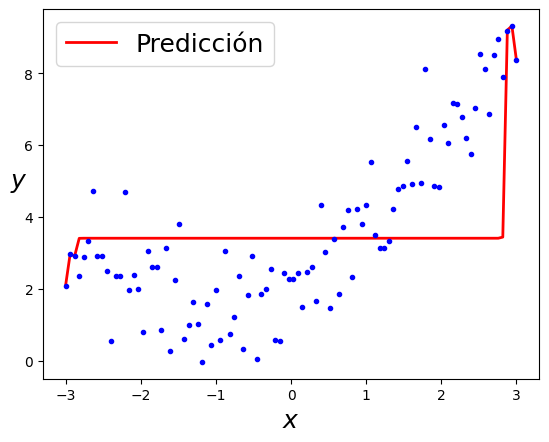

In [13]:
def print_equation(lin_reg):
    degree = len(lin_reg.coef_[0])
    print(f"Ecuación (grado {degree}): y = ", end="")
    for coef in lin_reg.coef_[0][::-1]:
        print(f"{coef}x^{degree}", end=" + ")
        degree -= 1
    print(f"{lin_reg.intercept_[0]}")

for degree in (1, 2, 3, 4, 5, 10, 20, 40):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_new = poly_features.fit_transform(X)

    lin_reg.fit(X_new, y)
    print_equation(lin_reg)

    rmse = -cross_val_score(lin_reg, X_new, y, scoring="neg_root_mean_squared_error", cv=5)
    print(f"RMSE Validación Cruzada: {rmse.mean()}")

    y_predict = lin_reg.predict(X_new)
    print(f"RMSE Entrenamiento: {root_mean_squared_error(y, y_predict)}")

    draw_prediction(X, y, y_predict)

### Curvas de aprendizaje
Otra forma de saberlo es mirar las curvas de aprendizaje.

Las curvas de aprendizaje son una herramienta para analizar cómo mejora un modelo a medida que aumenta la cantidad de datos de entrenamiento. También nos ayudan a detectar problemas de sesgo o varianza y entender si la relación entre la entrada y la salida es adecuada para un modelo lineal o si necesitamos algo más complejo.

Se trazan dos curvas principales:

- Error en el conjunto de entrenamiento:
    - Mide qué tan bien aprende el modelo en los datos de entrenamiento.
    - Un error bajo indica que el modelo ajusta bien los datos.
- Error en el conjunto de validación:
    - Mide qué tan bien generaliza el modelo a datos nuevos.
    - Si este error es alto, significa que el modelo no generaliza bien y hay sobreajuste.

Si la curva de validación y la de entrenamiento no se acercan con más datos, puede que el modelo sea inadecuado (por ejemplo, usar regresión lineal para datos no lineales).

Scikit-Learn tiene la función `learning_curve()` para ayudar con esto: entrena y evalúa el modelo usando validación cruzada.

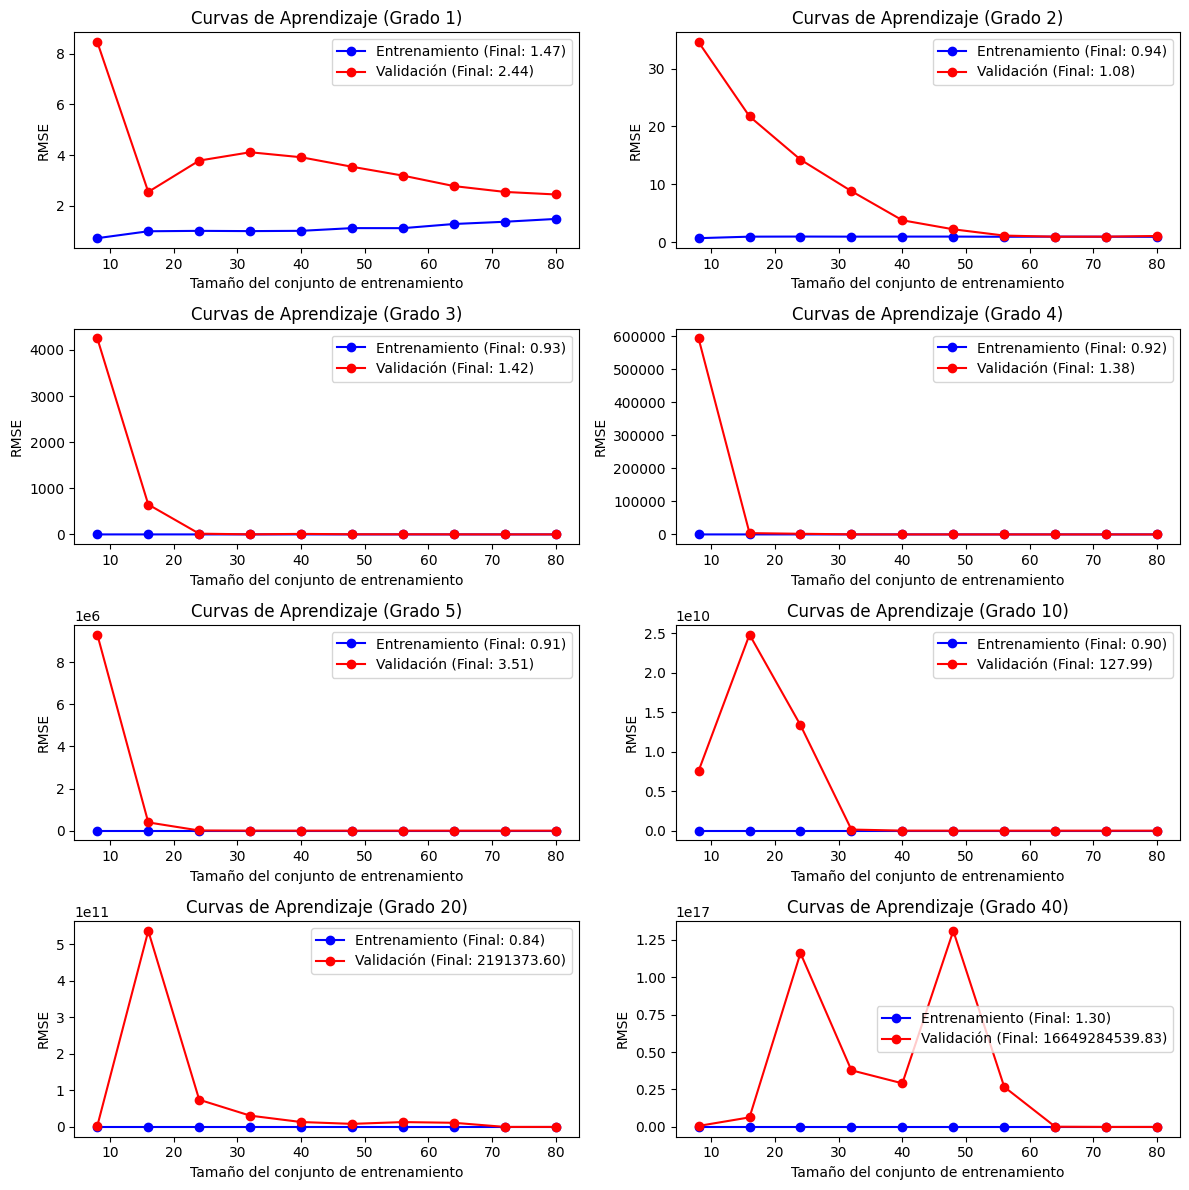

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

degrees = (1, 2, 3, 4, 5, 10, 20, 40)  # grados de polinomio a evaluar

plt.figure(figsize=(12, 12))

for i, degree in enumerate(degrees, 1):  # empieza i en 1
    # Creamos un pipeline con regresión polinómica del grado actual
    # Un Pipeline nos permite encadenar múltiples pasos de procesamiento y modelado
    poly_pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])

    # Obtener curvas de aprendizaje
    train_sizes, train_scores, val_scores = learning_curve(
        poly_pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calcular promedios de errores
    train_errors = -train_scores.mean(axis=1)
    val_errors = -val_scores.mean(axis=1)

    # Obtener error final
    final_train_error = train_errors[-1]
    final_val_error = val_errors[-1]

    # Graficar curvas de aprendizaje para cada grado
    plt.subplot(4, 2, i)
    plt.plot(train_sizes, train_errors, 'o-', label=f"Entrenamiento (Final: {final_train_error:.2f})", color='blue')
    plt.plot(train_sizes, val_errors, 'o-', label=f"Validación (Final: {final_val_error:.2f})", color='red')
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("RMSE")
    plt.title(f"Curvas de Aprendizaje (Grado {degree})")
    plt.legend()

plt.tight_layout()  # Ajusta los subgráficos para que no se superpongan
plt.show()